In [1]:
import pandas as pd

data = pd.read_excel("turret-calibration-use.xlsx", sheet_name="CanCoder Pot calibration data")

In [2]:
data

,encoderAngle,rotations,potentiometerVoltage,ideal voltage
0,-0.439453,0.001221,0.000000,0.000403
1,-0.439453,0.001221,0.000000,0.000403
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
4177,-3608.349609,10.023193,3.332031,3.307654
4178,-3608.349609,10.023193,3.332031,3.307654
4179,-3608.349609,10.023193,3.332031,3.307654
4180,-3608.349609,10.023193,3.332031,3.307654


# Now need to bucket the readings based on encoder angle (or rotations)
## THe following doesn't work

In [3]:
# bins = range(0,3610,10)

# data_binned = pd.cut(data["encoderAngle"], bins, precision=2,)
# data_binned.sort_values(ascending=True, inplace=True)

## Gettings a little closer

In [4]:
data.groupby(["encoderAngle"]).size()

encoderAngle
-3608.437500     13
-3608.349609    124
-3608.261719      2
-3608.173828      3
-3608.085938      2
               ... 
-1.142578         1
-0.878906         1
-0.439453         3
-0.087891         1
 0.000000        64
Length: 3911, dtype: int64

## Try again

In [5]:
data["angle_bucket"] = data.apply(lambda row: round(-row["encoderAngle"]/10)*10, axis=1)

In [6]:
data

,encoderAngle,rotations,potentiometerVoltage,ideal voltage,angle_bucket
0,-0.439453,0.001221,0.000000,0.000403,0
1,-0.439453,0.001221,0.000000,0.000403,0
2,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...
4177,-3608.349609,10.023193,3.332031,3.307654,3610
4178,-3608.349609,10.023193,3.332031,3.307654,3610
4179,-3608.349609,10.023193,3.332031,3.307654,3610
4180,-3608.349609,10.023193,3.332031,3.307654,3610


In [7]:
data.groupby(["angle_bucket"]).size()

angle_bucket
0        79
10       11
20       18
30       17
40       18
       ... 
3570      7
3580      9
3590      9
3600      9
3610    161
Length: 362, dtype: int64

In [8]:
potentiometerVoltage_data = data.drop(columns=["rotations", "ideal voltage"])
potentiometerVoltage_data.columns


Index(['encoderAngle', 'potentiometerVoltage', 'angle_bucket'], dtype='object')

In [9]:
potentiometerVoltage_data

,encoderAngle,potentiometerVoltage,angle_bucket
0,-0.439453,0.000000,0
1,-0.439453,0.000000,0
2,0.000000,0.000000,0
3,0.000000,0.000000,0
4,0.000000,0.000000,0
...,...,...,...
4177,-3608.349609,3.332031,3610
4178,-3608.349609,3.332031,3610
4179,-3608.349609,3.332031,3610
4180,-3608.349609,3.332031,3610


In [10]:
potentiometerVoltage_data.drop(columns=["encoderAngle"]).groupby(["angle_bucket"]).agg(["mean", "std", "count"])

potentiometerVoltage                
                             mean       std count
angle_bucket                                     
0                        0.000494  0.001307    79
10                       0.011009  0.002933    11
20                       0.018880  0.002415    18
30                       0.027574  0.003230    17
40                       0.037543  0.003580    18
...                           ...       ...   ...
3570                     3.301339  0.004176     7
3580                     3.310764  0.003960     9
3590                     3.320747  0.003054     9
3600                     3.328559  0.003054     9
3610                     3.332104  0.000530   161

[362 rows x 3 columns]

<AxesSubplot: >

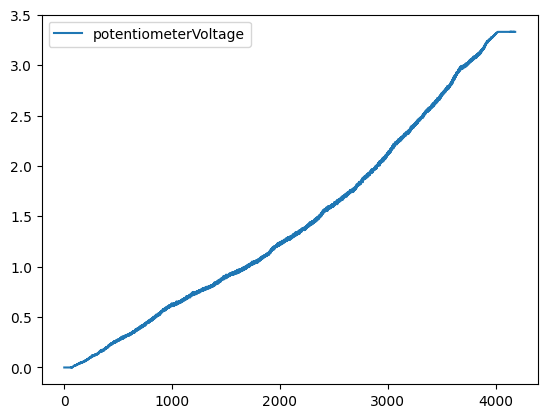

In [11]:
potentiometerVoltage_data.drop(columns=["encoderAngle", "angle_bucket"]).plot()


## Now get one greating from each group

In [12]:
one_data_point_per_group = potentiometerVoltage_data.groupby(["angle_bucket"]).first()

In [13]:
one_data_point_per_group

,encoderAngle,potentiometerVoltage
angle_bucket,,
0,-0.439453,0.000000
10,-5.800781,0.007812
20,-15.205078,0.015625
30,-25.224609,0.023438
40,-35.156250,0.031250
...,...,...
3570,-3567.216797,3.292969
3580,-3575.830078,3.304688
3590,-3585.498047,3.316406


In [14]:
# Add in ideal voltage
one_data_point_per_group.columns


Index(['encoderAngle', 'potentiometerVoltage'], dtype='object')

In [15]:
one_data_point_per_group

,encoderAngle,potentiometerVoltage
angle_bucket,,
0,-0.439453,0.000000
10,-5.800781,0.007812
20,-15.205078,0.015625
30,-25.224609,0.023438
40,-35.156250,0.031250
...,...,...
3570,-3567.216797,3.292969
3580,-3575.830078,3.304688
3590,-3585.498047,3.316406


In [16]:
# https://stackoverflow.com/questions/32460593/including-the-group-name-in-the-apply-function-pandas-python
one_data_point_per_group["idealVoltage"] = one_data_point_per_group.apply(lambda row: -row["encoderAngle"]/3600.0*3.3, axis=1)

<AxesSubplot: xlabel='angle_bucket'>

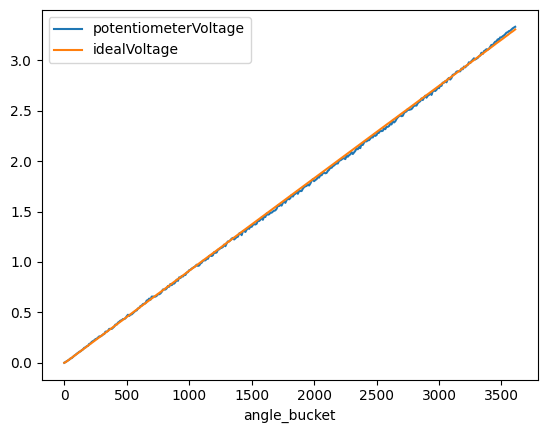

In [17]:
one_data_point_per_group.drop(columns=["encoderAngle"]).plot()

# Prepare data for output


In [18]:
result_data = one_data_point_per_group.drop(columns=["idealVoltage"])
result_data["rotations"] = result_data.apply(lambda row: -row["encoderAngle"]/360.0, axis=1)
result_data.drop(columns=["encoderAngle"], inplace=True)
result_data.rename(columns={"potentiometerVoltage": "voltage"}, inplace=True)
result_data

,voltage,rotations
angle_bucket,,
0,0.000000,0.001221
10,0.007812,0.016113
20,0.015625,0.042236
30,0.023438,0.070068
40,0.031250,0.097656
...,...,...
3570,3.292969,9.908936
3580,3.304688,9.932861
3590,3.316406,9.959717


In [19]:
result = result_data.to_json(orient="records", indent=4)
with open("cancoder-potentiometer-data-processed.json", "w") as f:
    f.write(result)

In [20]:
result

'[\n    {\n        "voltage":0.0,\n        "rotations":0.0012207031\n    },\n    {\n        "voltage":0.0078125,\n        "rotations":0.0161132812\n    },\n    {\n        "voltage":0.015625,\n        "rotations":0.0422363281\n    },\n    {\n        "voltage":0.0234375,\n        "rotations":0.0700683594\n    },\n    {\n        "voltage":0.03125,\n        "rotations":0.09765625\n    },\n    {\n        "voltage":0.04296875,\n        "rotations":0.1254882812\n    },\n    {\n        "voltage":0.046875,\n        "rotations":0.1528320312\n    },\n    {\n        "voltage":0.05859375,\n        "rotations":0.1809082031\n    },\n    {\n        "voltage":0.0703125,\n        "rotations":0.2099609375\n    },\n    {\n        "voltage":0.078125,\n        "rotations":0.2373046875\n    },\n    {\n        "voltage":0.08984375,\n        "rotations":0.2661132812\n    },\n    {\n        "voltage":0.09765625,\n        "rotations":0.2927246094\n    },\n    {\n        "voltage":0.109375,\n        "rotations":0